# AM2061 Algorithm 3-1
## Gaussian Elimination

The Method of Gaussian Elimination is an algoritm used to solve a system of linear equations.

It modifies an augmented matrix to solve a system of linear equations originally of form $Ax = b$ with:

\begin{gather}
\begin{bmatrix}
a_{11} & \dots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots \\
x_n
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\
\vdots \\
b_n
\end{bmatrix}
\end{gather}

and the augmented matrix:

\begin{bmatrix}
a_{11} & \dots & a_{1n} & b_1 \\
\vdots & \ddots & \vdots & \vdots \\
a_{n1} & \dots & a_{nn} & b_n
\end{bmatrix}

but we want this to have form:

\begin{bmatrix}
\tilde{a_{11}} & \dots & \dots & \tilde{a_{1n}} & \tilde{b_1} \\
0 & \tilde{a_{22}} &  & \vdots & \vdots \\
\vdots &  & \ddots & \vdots & \vdots \\
0 & \dots & 0 & \tilde{a_{nn}} & \tilde{b_n}
\end{bmatrix}

Where the $\sim$ denote the fact that the respective values have been modified. Note that we will not use the $\sim$ notation any futher, but any value changes are implied.

A brief explanation is as follows:

* By swapping rows or subtracting selected rows from each other we should be able to obtain the augmented matrix in the above form
  * This is done by taking the first index as the *pivot*
    * We can change the pivot by swapping a given row with the current first row in the matrix
  * We then use this pivot to find ratios with the other values below it
    * So that we can subtract these from those values such that they return $0$
  * Repeat this process for all rows and all columns until the modified augmented matrix is in the above form


* Otherwise, the system has no unique solution.


* Note that for large $n$ (unknowns and equations), the computation amount increases rapidly.

The following is the pseudocode provided:

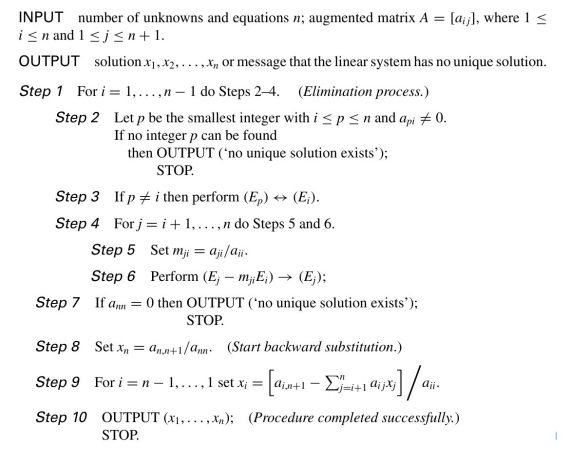

Let us now create this in Python.

First we must define a matrix set of linear equations, for simplicity I will use what was given in L08.

\begin{bmatrix}
1 & 1 & 0 & 3 & 4 \\
2 & 1 & -1 & 1 & 1 \\
3 & -1 & -1 & 2 & -3 \\
-1 & 2 & 3 & -1 & 4
\end{bmatrix}

In [4]:
import numpy as np

# Note that pseudocode starts indexing at 1, so n+1 is total length
a = np.array([[1, 1, 0, 3, 4], 
              [2, 1, -1, 1, 1], 
              [3, -1, -1, 2, -3], 
              [-1, 2, 3, -1, 4]])

Now let us define the algorithm, we only need to pass in the augmented matrix.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
# typo in pseudocode step 1, 2, 3, 4, 7, 8, 9, 10
def GaussianElimination(a):
    A = np.copy(a) # have to use this whenever wanting to reassign another part of a numpy array
    n = len(A[0]) - 2 # n + 1 is last usable index
    
    # Step 1
    for i in range(0, n):
        # Step 2
        p = -1 # since p can never be -1 if a solution is found, use this as determining case
        for p_index in range(i, n + 1):
            if A[p_index][i] != 0:
                p = p_index
                break
        # check that p was set to a valid index
        if p == -1:
            print("No unique solution exists.")
            return
        
        # Step 3
        if p != i:
            # need copy here as we will change A[p] after this and use tempEp
            tempEp = np.copy(A[p])
            
            # need copy here as we will change A[i] after this and use A[p]
            A[p] = np.copy(A[i])
            # dont need copy as we will no longer use tempEp
            A[i] = tempEp

        # Step 4
        for j in range(i + 1, n + 1):
            # ratio to see how much need to set first index to 0
            m = np.copy(A[j][i]) / np.copy(A[i][i])
            # should hopefully get 0's on bottomleft diagonal when done
            A[j] = np.copy(A[j]) - m * np.copy(A[i])

    # Step 5
    if A[n][n] == 0:
        print("No unique solution exists.")
        return
    
    # Step 6
    x = [0 for i in range(n + 1)] # list of solutions
    x[n] = np.copy(A[n][n + 1]) / np.copy(A[n][n]) # last index in A, solve with final b
    
    # Step 7
    for i in range(n, -1, -1): # backwards range, starts at n, finishes at 0
        summation = 0
        for j in range(i + 1, n + 1): # for loop to sum these elements
            summation += np.copy(A[i][j]) * x[j] # dont need copy for a python list
            
        x[i] = (np.copy(A[i][n + 1]) - summation) / np.copy(A[i][i])
        
    # Step 8
    print("Procedure completed successfully.")
    print(x)
    
    return x

We can now test this algorithm for a set of solutions, which will be returned as a list:

In [3]:
GaussianElimination(a)

Procedure completed successfully.
[-1.0, 2.0, 0.0, 1.0]


[-1.0, 2.0, 0.0, 1.0]